In [82]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline 

In [83]:
df=pd.read_csv('diabetes (1).csv')

In [84]:
x=df.iloc[:,:-1]

In [85]:
y=df['Outcome']

In [86]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [87]:
df.shape

(768, 9)

In [88]:
df.duplicated().sum()

0

In [89]:
df.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,11.354056,13.947131,9.214538,-4.390041,-28.555231,0.469774,-0.037426,21.570620,0.356618
Glucose,13.947131,1022.248314,94.430956,29.239183,1220.935799,55.726987,1.454875,99.082805,7.115079
BloodPressure,9.214538,94.430956,374.647271,64.029396,198.378412,43.004695,0.264638,54.523453,0.600697
SkinThickness,-4.390041,29.239183,64.029396,254.473245,802.979941,49.373869,0.972136,-21.381023,0.568747
Insulin,-28.555231,1220.935799,198.378412,802.979941,13281.180078,179.775172,7.066681,-57.143290,7.175671
BMI,0.469774,55.726987,43.004695,49.373869,179.775172,62.159984,0.367405,3.360330,1.100638
DiabetesPedigreeFunction,-0.037426,1.454875,0.264638,0.972136,7.066681,0.367405,0.109779,0.130772,0.027472
Age,21.570620,99.082805,54.523453,-21.381023,-57.143290,3.360330,0.130772,138.303046,1.336953
Outcome,0.356618,7.115079,0.600697,0.568747,7.175671,1.100638,0.027472,1.336953,0.227483


In [90]:
# Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
# understand the distribution and relationships between the variables.
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot: >

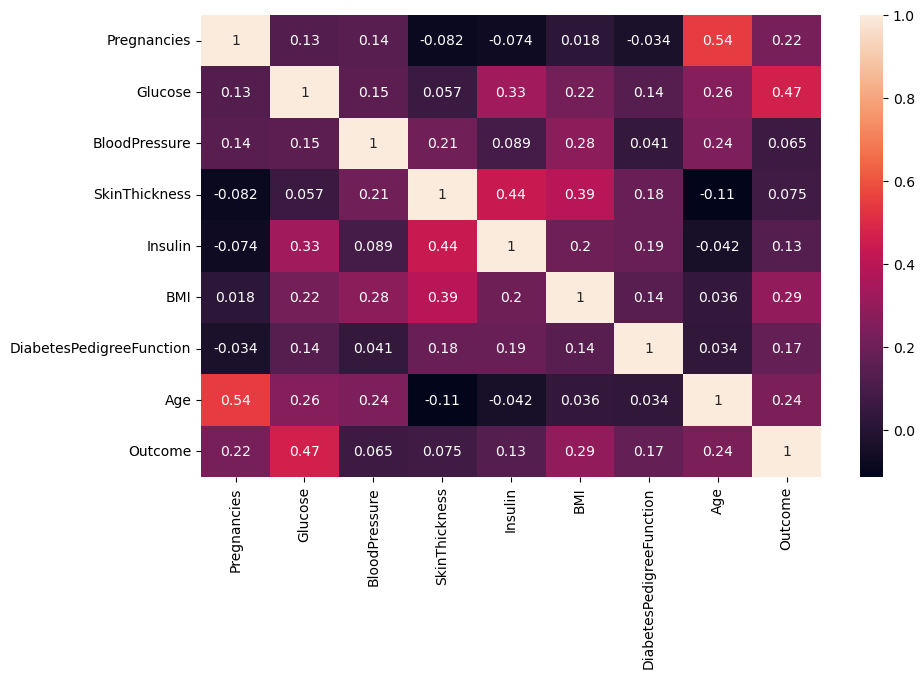

In [91]:
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [93]:
# Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
# variables into dummy variables if necessary.
# Ans 2 .Here is no null value 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [94]:
df.duplicated().sum()

0

In [96]:
# Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [97]:
from sklearn.tree import DecisionTreeClassifier
treeClassifier=DecisionTreeClassifier(criterion='entropy',
 max_depth=3,
 max_features='auto',
 splitter='best')

In [98]:
treeClassifier.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='auto')

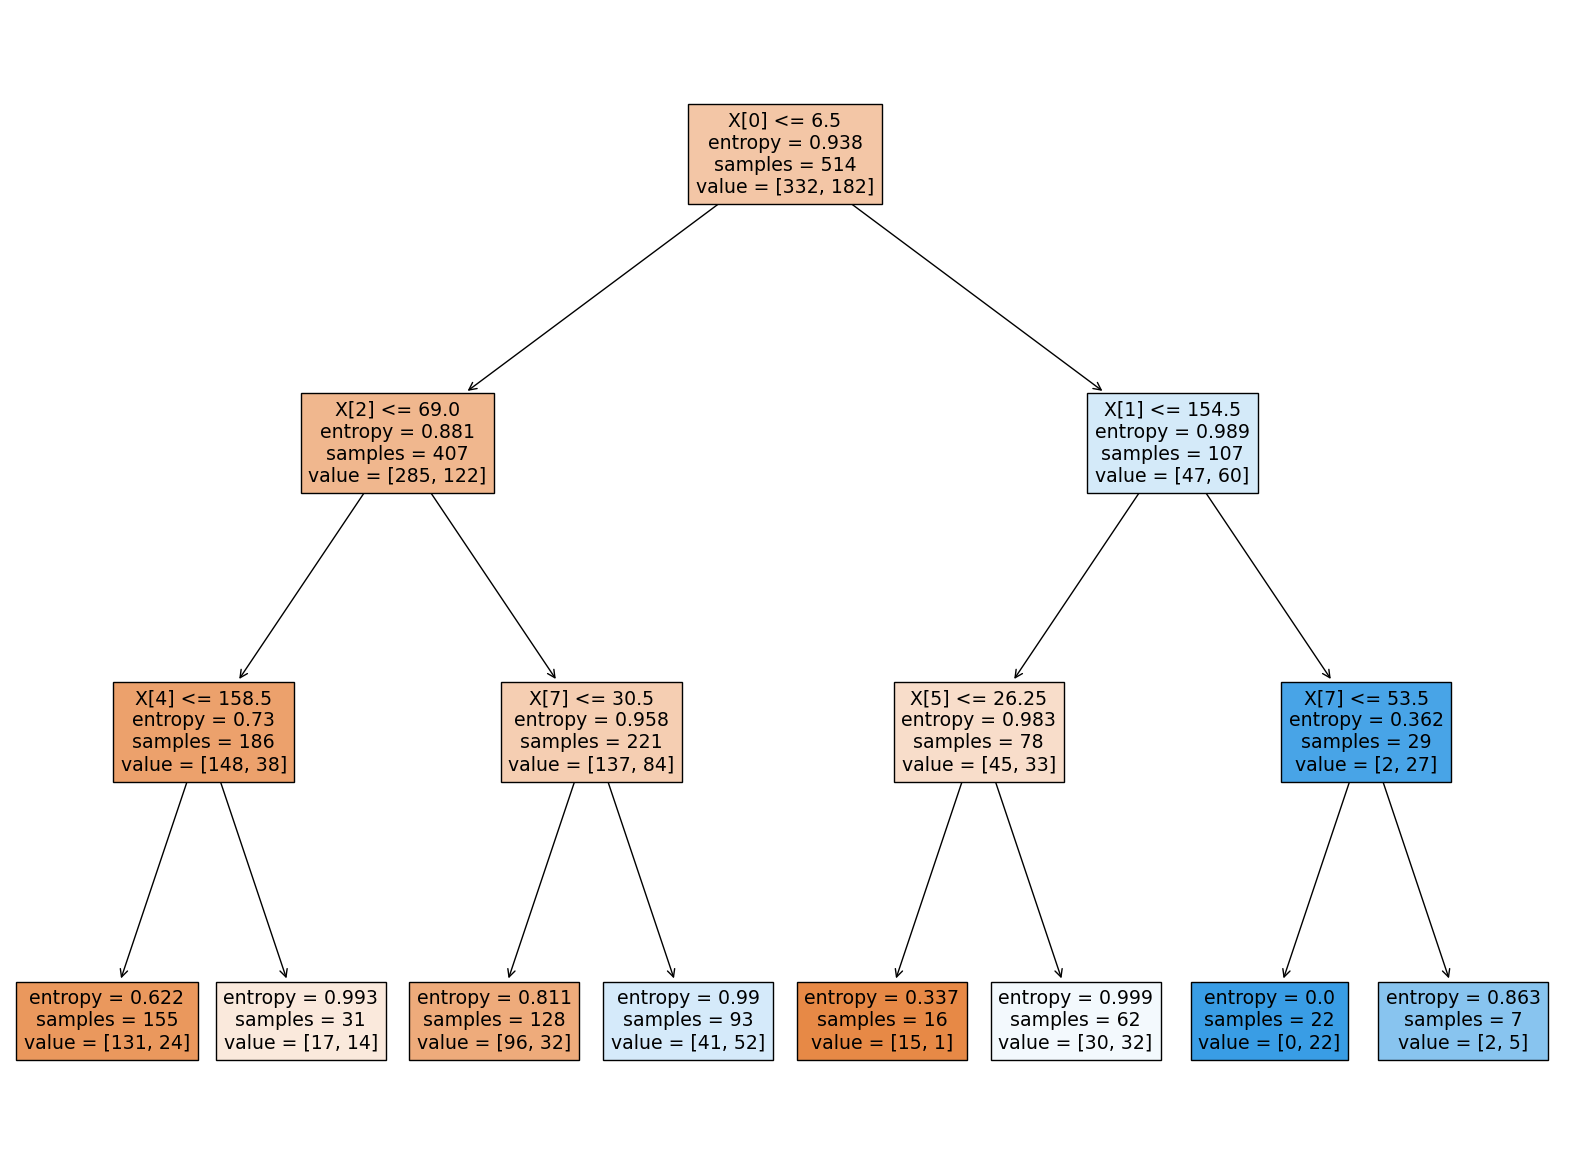

<Figure size 640x480 with 0 Axes>

In [99]:
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(treeClassifier,filled=True)
plt.show()
plt.savefig('dibetes_data.png')

In [100]:
x.iloc[:,:1]

,Pregnancies
0,6
1,1
2,8
3,1
4,0
...,...
763,10
764,2
765,5
766,1


In [101]:
y_pred=treeClassifier.predict(X_test)

In [102]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [103]:
from sklearn.metrics import classification_report,accuracy_score

In [104]:
score=accuracy_score(y_pred,Y_test)
print(score)

0.6771653543307087


In [105]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       156
           1       0.59      0.52      0.55        98

    accuracy                           0.68       254
   macro avg       0.66      0.65      0.65       254
weighted avg       0.67      0.68      0.67       254



In [106]:
import warnings
warnings.filterwarnings('ignore')

In [107]:
# Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
# cross-validation to optimize the hyperparameters and avoid overfitting.
# ANS4. 
parameter={
    "criterion":["gini", "entropy", "log_loss"], #here we take criterion 
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4.,5],
    'max_features':['auto','sqrt','log2'],
}

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
clf=GridSearchCV(treeClassifier,param_grid=parameter,cv=5,scoring='accuracy')

In [110]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                              max_features='auto'),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4.0, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [111]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [112]:
y_pred=clf.predict(X_test)

In [113]:
score=accuracy_score(y_pred,Y_test)
score

0.6456692913385826

In [114]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [115]:
# Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
# precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.
print(confusion_matrix(y_pred,Y_test))
print(accuracy_score(y_pred,Y_test))
print(classification_report(y_pred,Y_test))

[[120  42]
 [ 48  44]]
0.6456692913385826
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       162
           1       0.51      0.48      0.49        92

    accuracy                           0.65       254
   macro avg       0.61      0.61      0.61       254
weighted avg       0.64      0.65      0.64       254



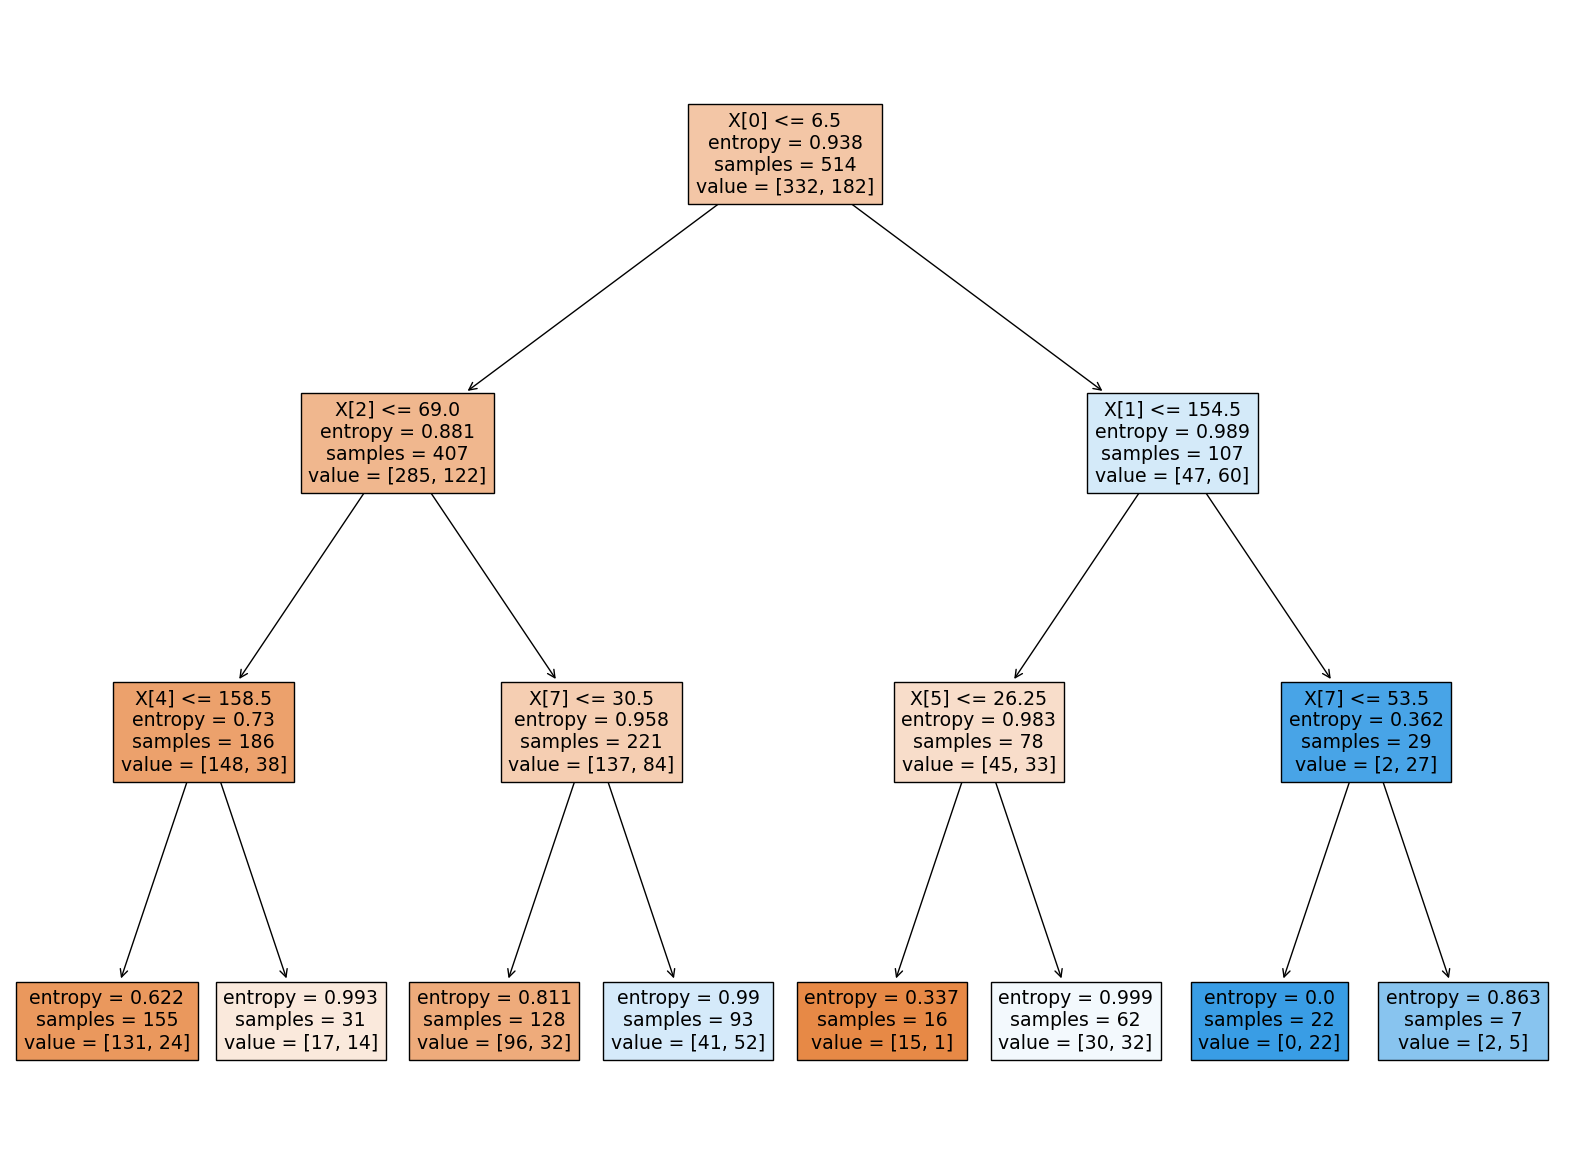

<Figure size 640x480 with 0 Axes>

In [116]:
# Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
# variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
# trends.
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(treeClassifier,filled=True)
plt.show()
plt.savefig('dibetes_data.png')

In [124]:
# Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
# dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
# risks.
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64